In [1]:
using LinearAlgebra, Images, Plots, LaTeXStrings, Measures

size(img) = (353, 469)
typeof(img) = Matrix{Gray{N0f8}}


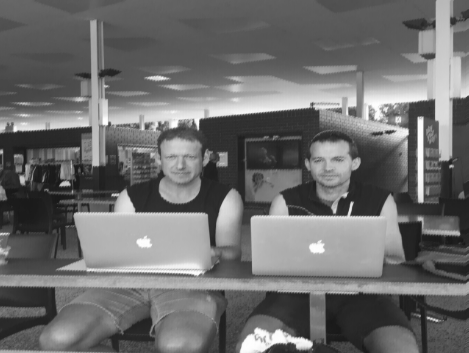

In [2]:
img = Gray.(load("dude-color-small.png"))
@show size(img)
@show typeof(img)
img

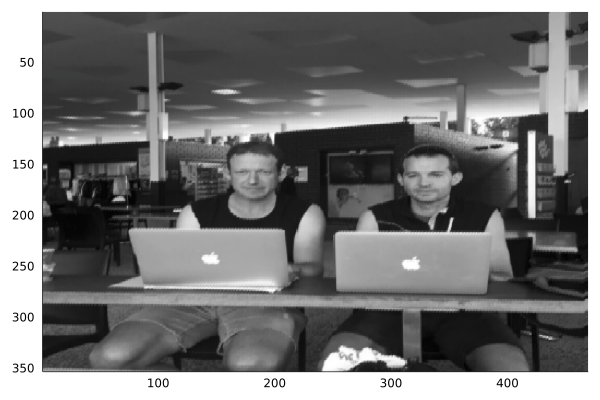

In [3]:
X = convert(Matrix{Float32},img)
heatmap(X,yflip=true,color=:greys,legend=false)

In [4]:
function rank_approx(F::SVD, k)
    U, S, V = F
    M = U[:, 1:k] * Diagonal(S[1:k]) * V[:, 1:k]'
    clamp01!(M)
end

rank_approx (generic function with 1 method)

In [5]:
F = svd(X)
X10 = rank_approx(F,10)
X30 = rank_approx(F,30)
X50 = rank_approx(F,50);

In [6]:
sum(F.S)

604.36005f0

In [10]:
total_errs =sum(F.S .^2)

37815.484f0

In [17]:
rel_errs = [sum(F.S[i:end].^2) for i in 5:100]/total_errs;

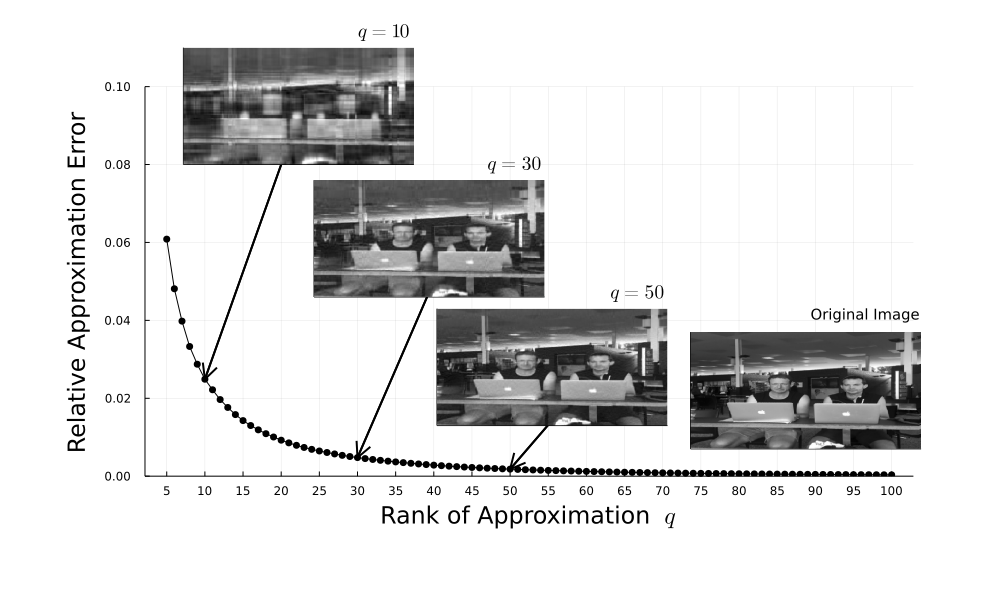

In [31]:
plot(   5:100,rel_errs,
        label=false,markershape=:circle,xticks=5:5:100,yticks=0:0.02:0.1,
        ms=4,xlabel="Rank of Approximation  "*L"q",ylabel="Relative Approximation Error",guidefont=font(16),
        ylim=(0,0.1),size=(1000,600),    margin=20mm,c=:black)
heatmap!(X10,yflip=true,legend=false, color = :greys,ticks=false,  
         inset = (1,bbox(-0.3, -0.45, 0.3, 0.3, :center)),
        subplot = 2,
        label=false,title=" "^28*L"q=10",titlefontsize=13)
heatmap!(X30,yflip=true,legend=false, color = :greys,ticks=false,  
         inset = (1,bbox(-0.13, -0.11, 0.3, 0.3, :center)),
        subplot = 3,
        label=false,title=" "^28*L"q=30",titlefontsize=13)
heatmap!(X50,yflip=true,legend=false, color = :greys,ticks=false,  
         inset = (1,bbox(0.03, 0.22, 0.3, 0.3, :center)),
        subplot = 4,
        label=false,title=" "^28*L"q=50",titlefontsize=13)
heatmap!(X,yflip=true,legend=false, color = :greys,ticks=false,  
         inset = (1,bbox(0.36, 0.28, 0.3, 0.3, :center)),
        subplot = 5,
        label=false,title=" "^25*"Original Image",titlefontsize=10)
quiver!([20], [0.08], quiver=([10-20], [rel_errs[10-5+1]-0.08]),c=:black,lw=2)
quiver!([40], [0.05], quiver=([30-40], [rel_errs[30-5+1]-0.05]),c=:black,lw=2)
quiver!([58], [0.02], quiver=([50-58], [rel_errs[50-5+1]-0.02]),c=:black,lw=2)

In [32]:
savefig("SVD_compress.pdf")

In [261]:
# plot(   5:100,F.S[5:100],
#         label=false,markershape=:circle,xticks=10:10:100,yticks=5:5:30,
#         ms=4,xlabel="Index  "*L"i",ylabel="Singular Values  "*L"\delta_i",guidefont=font(16),
#         ylim=(0,30),size=(1000,600),    margin=20mm,c=:black)
# heatmap!(X10,yflip=true,legend=false, color = :greys,ticks=false,  
#          inset = (1,bbox(-0.32, -0.45, 0.3, 0.3, :center)),
#         subplot = 2,
#         label=false,title=L"q=10",titlefontsize=10)
# heatmap!(X30,yflip=true,legend=false, color = :greys,ticks=false,  
#          inset = (1,bbox(-0.13, -0.11, 0.3, 0.3, :center)),
#         subplot = 3,
#         label=false,title=" "^10*L"q=30",titlefontsize=10)
# heatmap!(X50,yflip=true,legend=false, color = :greys,ticks=false,  
#          inset = (1,bbox(0.03, 0.22, 0.3, 0.3, :center)),
#         subplot = 4,
#         label=false,title=" "^20*L"q=50",titlefontsize=10)
# heatmap!(X,yflip=true,legend=false, color = :greys,ticks=false,  
#          inset = (1,bbox(0.36, 0.28, 0.3, 0.3, :center)),
#         subplot = 5,
#         label=false,title="Original Image",titlefontsize=10)
# quiver!([20], [25], quiver=([10-20], [F.S[10]-25]),c=:black,lw=2)
# quiver!([44], [20], quiver=([30-44], [F.S[30]-20]),c=:black,lw=2)
# quiver!([55], [5], quiver=([50-55], [F.S[50]-5]),c=:black,lw=2)

In [227]:
savefig("SVD_compress.pdf")

In [270]:
353*469

165557

In [271]:
50*(1+353+469)

41150

In [272]:
41150/165557

0.24855487838025575